# Лабораторная работа 5. Анимация качения треугольника Рело по квадрату. Векторизация вычислений в numpy

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo1

In [2]:
import matplotlib.animation as anim
%matplotlib widget

## Этап 1. Изображение начального положения треугольника Рело и квадрата в одной графической области

In [3]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело
relo_matrix = relo1.regular_polygon_Relo(n=n,center=center,r=r, N=N, show = False)


In [4]:
square = np.array([[center[0]+r//2,center[1]+r//2],[center[0]+r//2,center[1]-r//2],
                  [center[0]-r//2,center[1]-r//2],[center[0]-r//2,center[1]+r//2],[center[0]+r//2,center[1]+r//2]])
square

array([[ 5.,  5.],
       [ 5., -5.],
       [-5., -5.],
       [-5.,  5.],
       [ 5.,  5.]])

(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

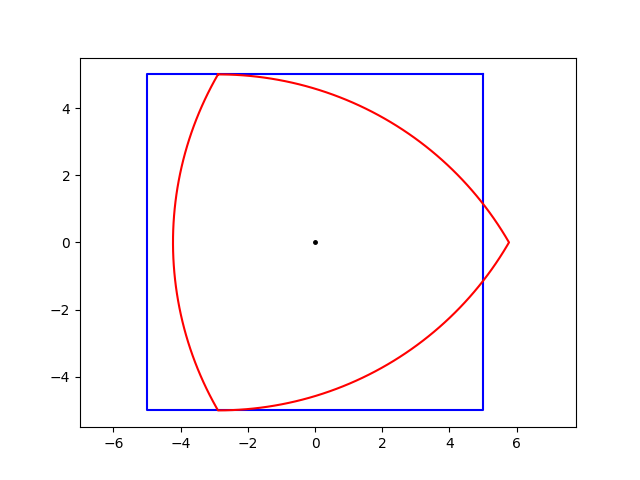

In [5]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

In [6]:
shift = np.array([min(relo_matrix[:,0])-min(square[:,0]),0])
shift

array([0.77364255, 0.        ])

In [7]:
relo_matrix_shifted = relo_matrix - shift
print(center)
center -= shift
center

[0. 0.]


array([-0.77364255,  0.        ])

(-5.5, 5.5, -5.5, 5.500000000000001)

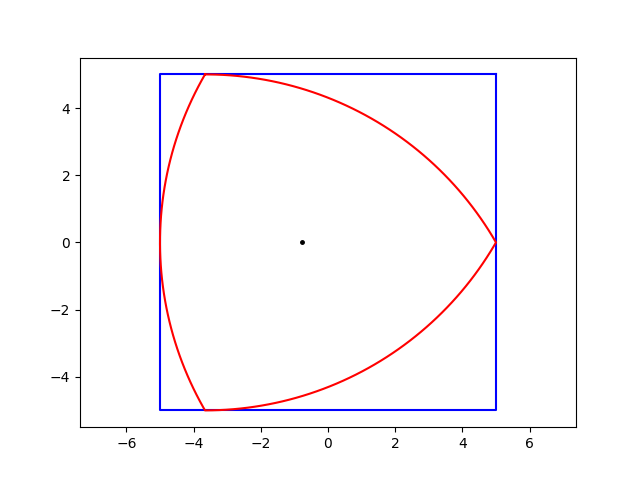

In [8]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

## Этап 2. Анимация поступательного движения треугольника Рело по заданной траектории

In [9]:
N_frames = 100

In [10]:
t_center = np.linspace(-np.pi, np.pi, N_frames) #все углы круга
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)]) #получаем круг относительно центра с радиусом смещения - shift

In [11]:
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame] #матрица, смещенная на frame вокруг окружности center_frame

(-5.5, 5.5, -5.5, 5.500000000000001)

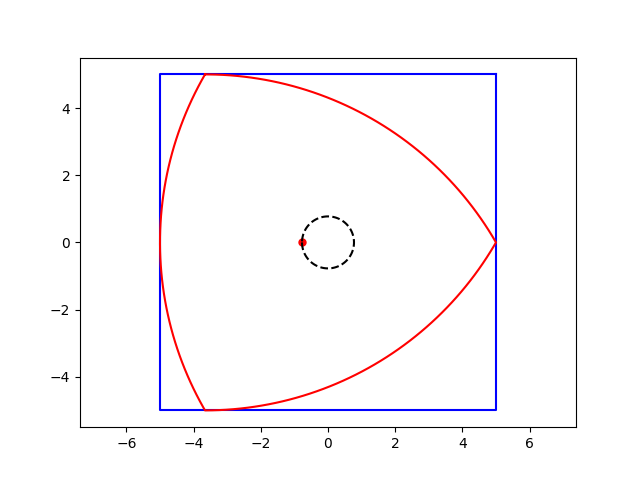

In [12]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

In [13]:
def draw_frame(r, N_frames, frame=0):
    n = 3
    center = np.array([0.,0.])
    r = 10 
    N = 100 
    relo_matrix = relo1.regular_polygon_Relo(n=n,center=center,r=r, N=N, show = False)
    square = np.array([[center[0]+r//2,center[1]+r//2],[center[0]+r//2,center[1]-r//2],
                  [center[0]-r//2,center[1]-r//2],[center[0]-r//2,center[1]+r//2],[center[0]+r//2,center[1]+r//2]])
    
    shift = np.array([min(relo_matrix[:,0])-min(square[:,0]),0])
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    #print(center_frame)
    
    plt.figure()
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

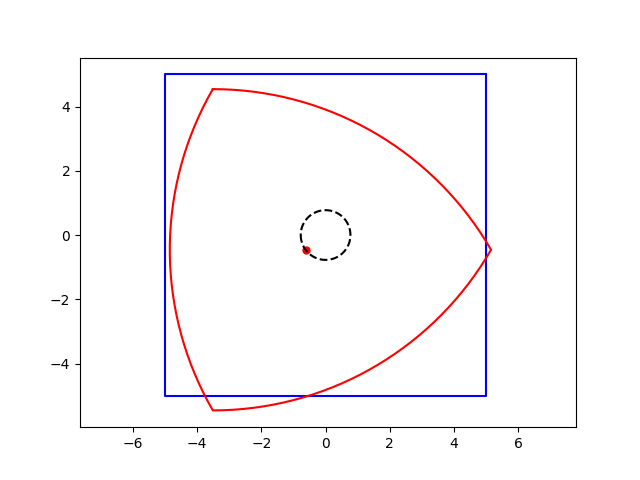

In [14]:
draw_frame(r=r, N_frames=100, frame=10)

In [15]:
from matplotlib.animation import FuncAnimation

In [16]:
n = 3
center = np.array([0.,0.])
r = 10 
N = 100 
relo_matrix = relo1.regular_polygon_Relo(n=n,center=center,r=r, N=N, show = False)
square = np.array([[center[0]+r//2,center[1]+r//2],[center[0]+r//2,center[1]-r//2],
                  [center[0]-r//2,center[1]-r//2],[center[0]-r//2,center[1]+r//2],[center[0]+r//2,center[1]+r//2]])
    
shift = np.array([min(relo_matrix[:,0])-min(square[:,0]),0])
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
#center_frame

In [17]:
center_frame_times = np.concatenate([center_frame for _ in range(3)])

In [18]:
len(center_frame), len(center_frame_times)

(100, 300)

In [19]:
def at_frame1(t):
    
    point.set_data(t)
    relo_matrix_shifted = relo_matrix + t
    relo.set_data(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1])
    return None



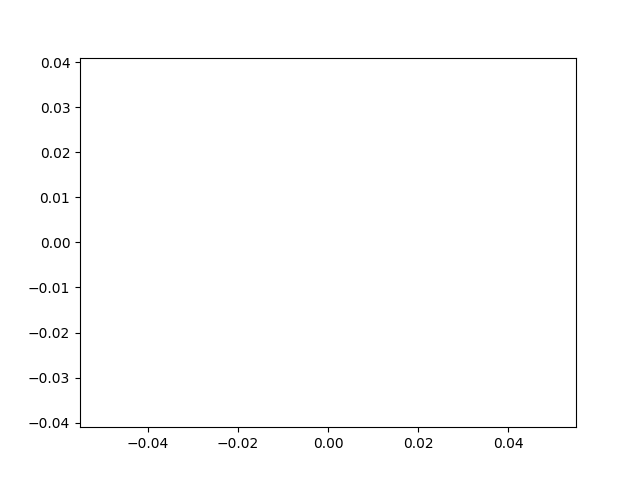

In [20]:
fig1 = plt.figure()
ax1 = plt.axes()
#plt.axis([np.min(square[:,0])-5,np.max(square[:,0])+5,np.min(square[:,1])-5,np.max(square[:,1])+5],'equal')
plt.axis('equal');

def init1():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    n = 3
    center = np.array([0.,0.])
    r = 10 
    N = 100 
    relo_matrix = relo1.regular_polygon_Relo(n=n,center=center,r=r, N=N, show = False)
    
    global point, relo # видны в at_frame1
    sq, = ax1.plot(square[:,0],square[:,1],'b-') # квадрат
    
    shift = np.array([min(relo_matrix[:,0])-min(square[:,0]),0])
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    circ, = ax1.plot(center_frame[:,0],center_frame[:,1],'k--') # круг(траектория)
    
    point, = ax1.plot(center_frame[frame,0],center_frame[frame,1],'go',markersize=10) # подвижная точка
    
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    relo, = ax1.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    
    return None

    
FuncAnimation(fig1, at_frame1, frames=center_frame_times[::-1], init_func=init1, repeat=False, interval=30) 

## Этап 3. Анимация поступательного и вращательного движения треугольника Рело

In [21]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]]) #функция матрицы поворота
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

In [24]:
relo_matrix

array([[-2.88675135e+00,  5.00000000e+00],
       [-2.93915464e+00,  4.90811596e+00],
       [-2.99058309e+00,  4.81568276e+00],
       [-3.04103094e+00,  4.72271075e+00],
       [-3.09049256e+00,  4.62921032e+00],
       [-3.13896240e+00,  4.53519194e+00],
       [-3.18643505e+00,  4.44066613e+00],
       [-3.23290519e+00,  4.34564346e+00],
       [-3.27836762e+00,  4.25013456e+00],
       [-3.32281726e+00,  4.15415013e+00],
       [-3.36624913e+00,  4.05770090e+00],
       [-3.40865838e+00,  3.96079766e+00],
       [-3.45004025e+00,  3.86345126e+00],
       [-3.49039012e+00,  3.76567258e+00],
       [-3.52970347e+00,  3.66747257e+00],
       [-3.56797591e+00,  3.56886222e+00],
       [-3.60520315e+00,  3.46985255e+00],
       [-3.64138103e+00,  3.37045465e+00],
       [-3.67650550e+00,  3.27067963e+00],
       [-3.71057262e+00,  3.17053867e+00],
       [-3.74357859e+00,  3.07004296e+00],
       [-3.77551972e+00,  2.96920375e+00],
       [-3.80639243e+00,  2.86803233e+00],
       [-3.

In [22]:
theta = np.pi/3
matrix = rotate_matrix(theta) #матрица поворота при тета pi/3
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix]) #каждую координату умножаем векторно на матрицу поворота

(-6.3508529610858835, 6.350852961085886, -5.500000000000004, 5.500000000000001)

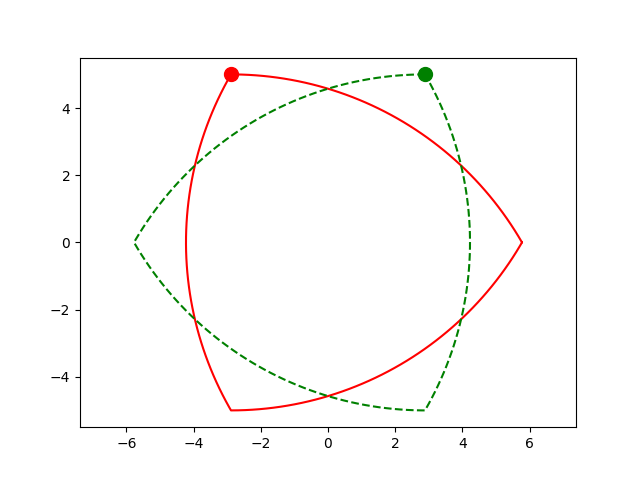

In [23]:
plt.figure()
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

In [24]:
theta = np.linspace(0, 2*np.pi/3, N_frames) #уже не один угол, а массив равноудаленных углов

(-5.501733193293429, 5.536397059162015, -5.50028119393714, 5.50590507267995)

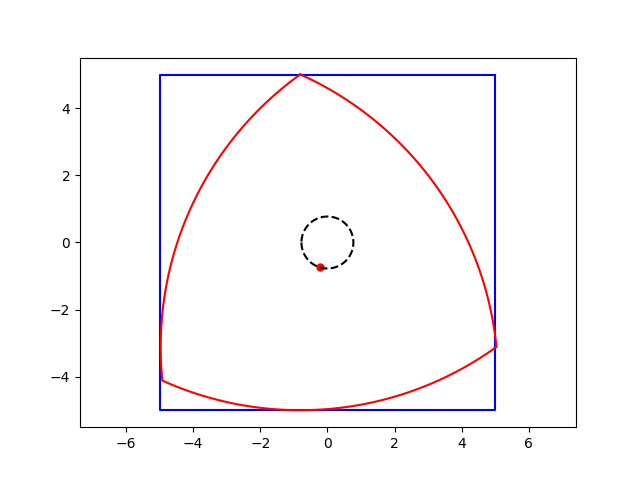

In [25]:
frame = 20
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
+ center_frame[frame])
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

In [26]:
def draw_frame_update(r, N_frames, frame=0):
    n = 3
    center = np.array([0.,0.])
    r = 10 
    N = 100 
    relo_matrix = relo1.regular_polygon_Relo(n=n,center=center,r=r, N=N, show = False)
    square = np.array([[center[0]+r//2,center[1]+r//2],[center[0]+r//2,center[1]-r//2],
                  [center[0]-r//2,center[1]-r//2],[center[0]-r//2,center[1]+r//2],[center[0]+r//2,center[1]+r//2]])
    
    shift = np.array([min(relo_matrix[:,0])-min(square[:,0]),0])
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])+ center_frame[frame])
    #print(center_frame)
    
    plt.figure()
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

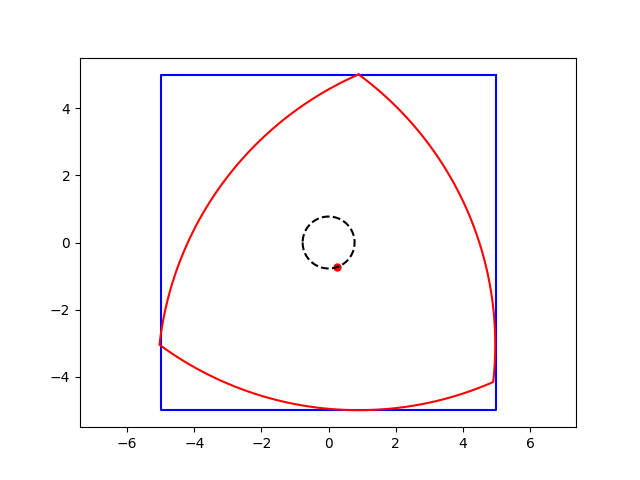

In [27]:
draw_frame_update(r=r, N_frames=100, frame=30)

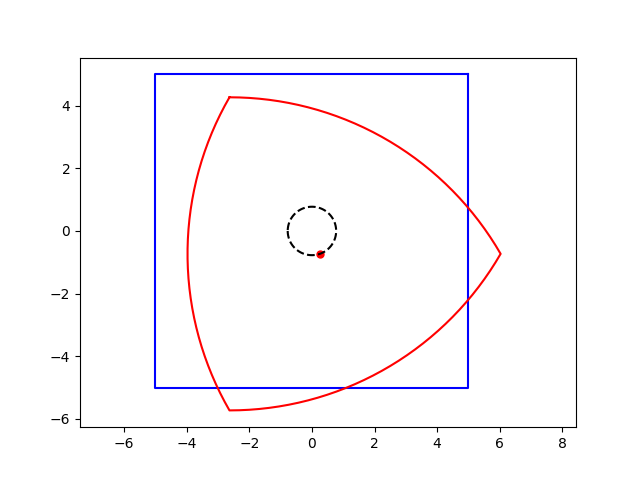

In [28]:
draw_frame(r=r, N_frames=100, frame=30) #прошлая функция без поворота

In [29]:
n = 3
center = np.array([0.,0.])
r = 10 
N = 100 
relo_matrix = relo1.regular_polygon_Relo(n=n,center=center,r=r, N=N, show = False)
square = np.array([[center[0]+r//2,center[1]+r//2],[center[0]+r//2,center[1]-r//2],
                  [center[0]-r//2,center[1]-r//2],[center[0]-r//2,center[1]+r//2],[center[0]+r//2,center[1]+r//2]])
    
shift = np.array([min(relo_matrix[:,0])-min(square[:,0]),0])
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
#print(np.where(center_frame == [-7.73642553e-01 -9.47438876e-17])[0])
#print(type(center_frame))
#index = np.where(center_frame == [-7.73642553e-01 -9.47438876e-17])
#print(index)
#print(center_frame)
matrix_indexes = np.array([i for i in range(N)])

theta = np.linspace(0, 2*np.pi/3, N_frames)
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]]) 

matrix_indexes
#center_frame

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [30]:
def at_frame2(t):
    
    #point.set_data(t)
    point.set_data(center_frame[t,0],center_frame[t,1])
    
    matrix = rotate_matrix(theta[t])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])+ center_frame[t])
    
    relo.set_data(relo_matrix_changed[:,0],relo_matrix_changed[:,1])
    return None



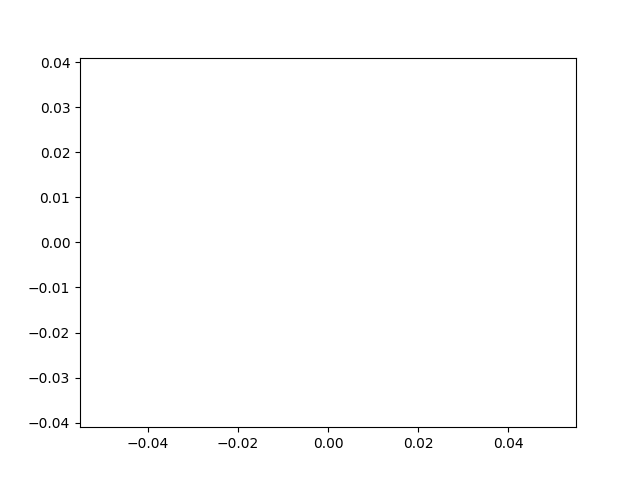

In [73]:
fig2 = plt.figure()
ax2 = plt.axes()
#plt.axis([np.min(square[:,0])-5,np.max(square[:,0])+5,np.min(square[:,1])-5,np.max(square[:,1])+5],'equal')
plt.axis('equal');

def init2():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    n = 3
    center = np.array([0.,0.])
    r = 10 
    N = 100 
    relo_matrix = relo1.regular_polygon_Relo(n=n,center=center,r=r, N=N, show = False)
    
    global point, relo # видны в at_frame1
    sq, = ax2.plot(square[:,0],square[:,1],'b-') # квадрат
    
    shift = np.array([min(relo_matrix[:,0])-min(square[:,0]),0])
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    circ, = ax2.plot(center_frame[:,0],center_frame[:,1],'k--') # круг(траектория)
    
    point, = ax2.plot(center_frame[frame,0],center_frame[frame,1],'go',markersize=10) # подвижная точка
    
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]]) 
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])+ center_frame[frame])
    relo, = ax2.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    
    return None

    
FuncAnimation(fig2, at_frame2, frames=matrix_indexes[::-1], init_func=init2, repeat=False, interval=50) 